In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

In [3]:

df = pd.read_csv('/content/drive/MyDrive/Praktikum/Pertemuan 07/Data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [12]:
target_column = 'N'

all_columns = df.columns.tolist()
start_index = all_columns.index('b11')
feature_columns = all_columns[start_index:]

selected_columns = feature_columns + [target_column]
data_subset = df[selected_columns].dropna()

X = data_subset[feature_columns]
Y = data_subset[target_column]

print(f"Target (Y): {target_column}")
print(f"Jumlah Fitur (X): {len(feature_columns)} kolom")

Target (Y): N
Jumlah Fitur (X): 20 kolom


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Jumlah data latih (train): {X_train.shape[0]} baris")
print(f"Jumlah data uji (test): {X_test.shape[0]} baris")

Jumlah data latih (train): 475 baris
Jumlah data uji (test): 119 baris


In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
rf_preds = rf_model.predict(X_test)

In [17]:
rf_r2 = r2_score(y_test, rf_preds)

rf_mae = mean_absolute_error(y_test, rf_preds)


print("--- EVALUASI MODEL SELESAI ---")

print("\n--- Random Forest ---")
print(f"  R-squared (R2): {rf_r2:.4f}")
print(f"  Mean Absolute Error (MAE): {rf_mae:.4f}")

--- EVALUASI MODEL SELESAI ---

--- Random Forest ---
  R-squared (R2): 0.6078
  Mean Absolute Error (MAE): 0.1913


Membuat Plot 1: Sebenarnya vs. Prediksi...


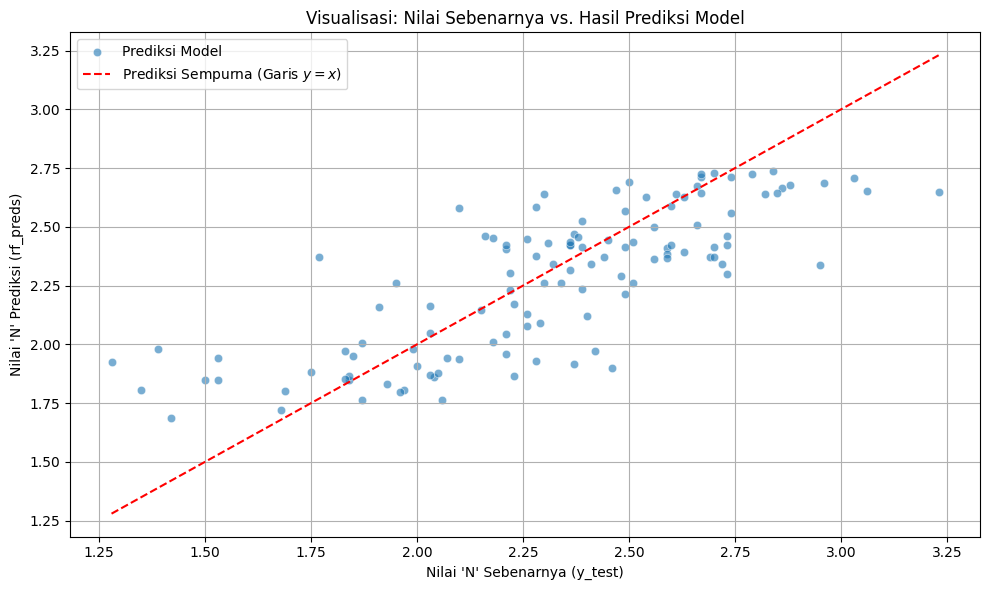

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Membuat Plot 1: Sebenarnya vs. Prediksi...")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.6, label='Prediksi Model')

max_val = max(y_test.max(), rf_preds.max())
min_val = min(y_test.min(), rf_preds.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Prediksi Sempurna (Garis $y=x$)')

plt.xlabel("Nilai 'N' Sebenarnya (y_test)")
plt.ylabel("Nilai 'N' Prediksi (rf_preds)")
plt.title('Visualisasi: Nilai Sebenarnya vs. Hasil Prediksi Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

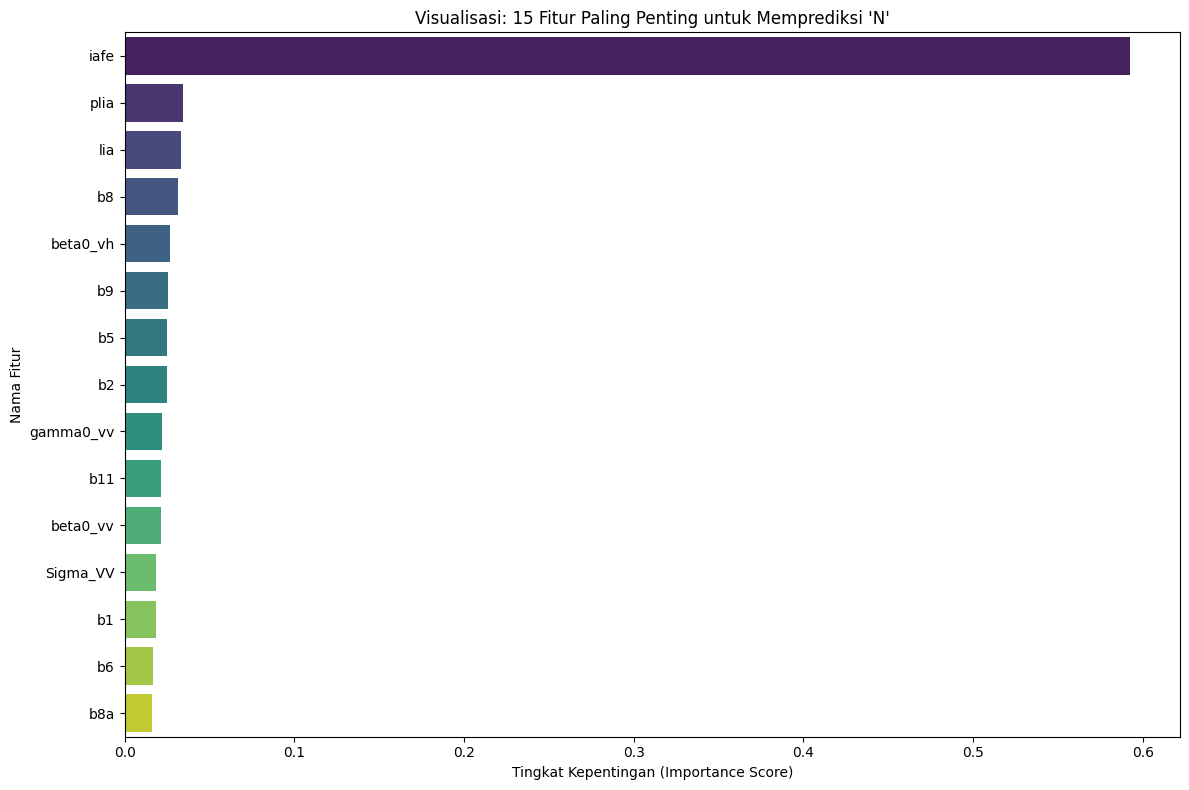

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Tingkat Kepentingan': importances
})

importance_df = importance_df.sort_values(by='Tingkat Kepentingan', ascending=False)
top_15_features = importance_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Tingkat Kepentingan', y='Fitur', data=top_15_features, palette='viridis', hue='Fitur', legend=False)
plt.title("Visualisasi: 15 Fitur Paling Penting untuk Memprediksi 'N'")
plt.xlabel('Tingkat Kepentingan (Importance Score)')
plt.ylabel('Nama Fitur')
plt.tight_layout()
plt.show()